In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
data, target = make_moons(n_samples = 1000, noise = 0.05 )

In [ ]:
data[:5]

array([[ 1.09772521, -0.5344259 ],
       [ 0.27023115, -0.19827305],
       [ 0.9057009 ,  0.44848618],
       [ 0.97509461,  0.46949295],
       [ 0.09852956,  0.00177532]])

In [ ]:
target[:5]

array([1, 1, 0, 0, 1])

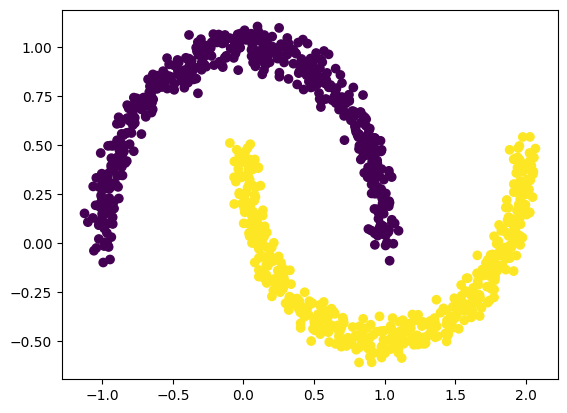

In [ ]:
plt.scatter(data[:,0],data[:, 1], c = target)
plt.show()

In [ ]:
model = Sequential([
    Input(shape = [None, 2]),
    Dense(6, activation = "relu"),
    Dense(6, activation = "relu"),
    Dense(7, activation = 'sigmoid'),
    Dense(1, activation = "sigmoid")
])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.25)

In [ ]:
x_train.shape

(750, 2)

In [ ]:
x_test.shape

(250, 2)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'] )
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 0.8409 - accuracy: 0.4893 - val_loss: 0.7632 - val_accuracy: 0.5320
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.7991 - accuracy: 0.4893 - val_loss: 0.7294 - val_accuracy: 0.5320
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7628 - accuracy: 0.4893 - val_loss: 0.7005 - val_accuracy: 0.5320
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7311 - accuracy: 0.4893 - val_loss: 0.6745 - val_accuracy: 0.5320
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7026 - accuracy: 0.4893 - val_loss: 0.6498 - val_accuracy: 0.5320
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6761 - accuracy: 0.4893 - val_loss: 0.6255 - val_accuracy: 0.5320
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.4893 - val_loss: 0.6021 - val_accuracy: 0.5360
Epoch 8/100


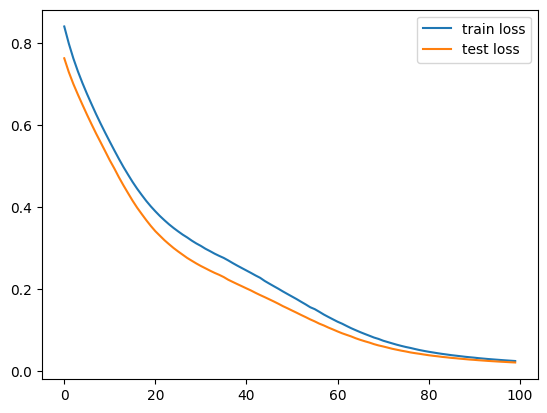

In [ ]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

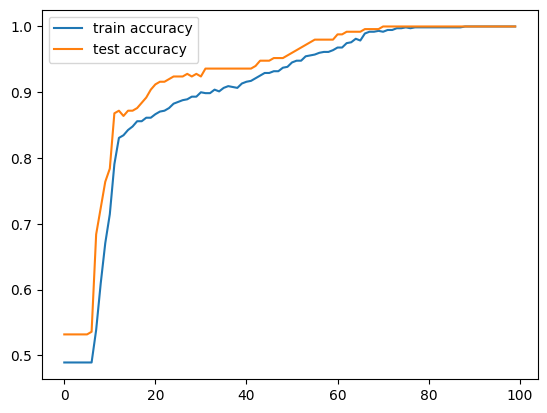

In [ ]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = np.round(model.predict(x_test))

8/8 [==============================] - 0s 3ms/step


In [ ]:
y_pred[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

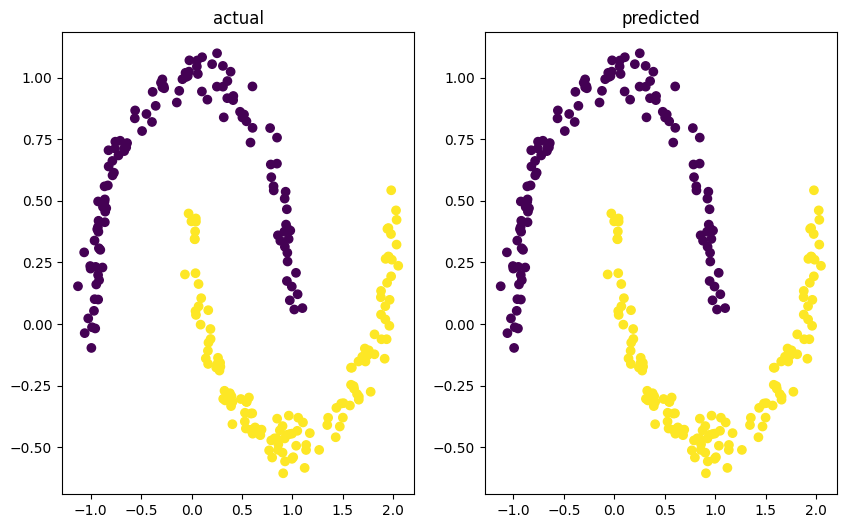

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.title("actual")
plt.scatter(x_test[:,0], x_test[:,1], c = y_test)
plt.subplot(1,2,2)
plt.title("predicted")
plt.scatter(x_test[:,0], x_test[:,1], c = y_pred)
plt.show()